<div class="alert alert-block alert-info">
    <h2 align="center">Digit Classification using Random Forest</h2>
    <h4 align="center"><a href="https://t.me/afsharino">Mohammad Afshari</a></h4>
</div>

<style>
.aligncenter {
    text-align: center;
}
</style>
<p class="aligncenter">
    <img src = "https://bigdata-ir.com/wp-content/uploads/2019/08/0123456789-660x330.jpg"  width=70%>
</p>

# Import libraries

In [1]:
# Scientific 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt

# Load dataset
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset

# Machine learning
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Image
from PIL import Image

# Others
import os
import glob
import warnings
warnings.filterwarnings("ignore")

# Find dataset path

In [2]:
# print current working directory
print(f"current working directory: {os.getcwd()}")

# Change directory
os.chdir("/home/afsharino/Desktop/github_local/B.SC-Students/08. Data Mining/Digit Classification Using Random Forest/")

# list all of file in directory
print(f"list of directories in {os.getcwd()}: {os.listdir()}")

# Change directory
os.chdir("/home/afsharino/Desktop/github_local/B.SC-Students/08. Data Mining/Digit Classification Using Random Forest/datasets")

# list all of file in directory
print(f"list of directories in {os.getcwd()}: {os.listdir()}")

# Change directory
os.chdir("/home/afsharino/Desktop/github_local/B.SC-Students/08. Data Mining/Digit Classification Using Random Forest/datasets/DigitDB")

# list all of file in directory
print(f"list of directories in {os.getcwd()}: {os.listdir()}")

# print current working directory
print(f"current working directory: {os.getcwd()}")

current working directory: /home/afsharino/Desktop/github_local/B.SC-Students/08. Data Mining/Digit Classification Using Random Forest/src
list of directories in /home/afsharino/Desktop/github_local/B.SC-Students/08. Data Mining/Digit Classification Using Random Forest: ['images', 'src', 'datasets']
list of directories in /home/afsharino/Desktop/github_local/B.SC-Students/08. Data Mining/Digit Classification Using Random Forest/datasets: ['DigitDB']
list of directories in /home/afsharino/Desktop/github_local/B.SC-Students/08. Data Mining/Digit Classification Using Random Forest/datasets/DigitDB: ['RemainingSamples.cdb', 'Train 60000.cdb', 'Test 20000.cdb']
current working directory: /home/afsharino/Desktop/github_local/B.SC-Students/08. Data Mining/Digit Classification Using Random Forest/datasets/DigitDB


# Load dataset

In [3]:
print('Reading Train 60000.cdb ...')
train_images, train_labels = read_hoda_dataset(r'/home/afsharino/Desktop/github_local/B.SC-Students/'
                                               r'08. Data Mining/Digit Classification Using Random Forest/'
                                               r'datasets/DigitDB/Train 60000.cdb',
                                               images_height=32,
                                               images_width=32,
                                               one_hot=False,
                                               reshape=True)
print('Done.')

print('Reading Test 20000.cdb ...')
test_images, test_labels = read_hoda_dataset(r'/home/afsharino/Desktop/github_local/B.SC-Students/'
                                             r'08. Data Mining/Digit Classification Using Random Forest/'
                                             r'datasets/DigitDB/Test 20000.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=False,
                                             reshape=True)
print('Done.')

print('Reading remaining samples dataset RemainingSamples.cdb ...')
X_remaining, Y_remaining = read_hoda_dataset(r'/home/afsharino/Desktop/github_local/B.SC-Students/'
                                             r'08. Data Mining/Digit Classification Using Random Forest/'
                                             r'datasets/DigitDB/RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=False,
                                             reshape=True)
print('Done.')

Reading Train 60000.cdb ...
Done.
Reading Test 20000.cdb ...
Done.
Reading remaining samples dataset RemainingSamples.cdb ...
Done.


# Inspect data

In [4]:
print(f"The dataset contains {len(train_images)} train data and "
      f"{len(test_images)} test data.")

The dataset contains 60000 train data and 20000 test data.


In [5]:
print(f"The remaining dataset contains {X_remaining.shape[0]} samples.")

The remaining dataset contains 22352 samples.


### split remained dataset and merge with other datasets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_remaining,
                                                    Y_remaining,
                                                    stratify=Y_remaining,
                                                    test_size=0.25)

In [7]:
train_images = np.concatenate((train_images, x_train), axis=0)
train_labels = np.concatenate((train_labels, y_train), axis=0)
test_images = np.concatenate((test_images, x_test), axis=0)
test_labels = np.concatenate((test_labels, y_test), axis=0)

In [8]:
print(f"Number of samples in testing: {test_images.shape[0]} => "
      f"{test_images.shape[0] / (80000+22352) * 100:.1f}% of the"
      f" original set")

Number of samples in testing: 25588 => 25.0% of the original set


In [9]:
print(f"Number of samples in training: {train_images.shape[0]} => "
      f"{train_images.shape[0] / (80000+22352) * 100:.1f}% of the"
      f" original set")

Number of samples in training: 76764 => 75.0% of the original set


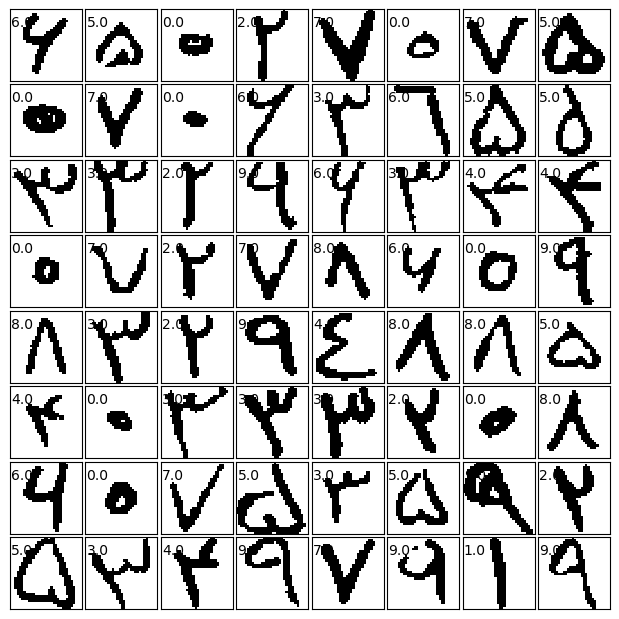

In [10]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(train_images[i].reshape(-1,32), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(train_labels[i]))

# Fit a model and make predictions

In [11]:
model = RandomForestClassifier(n_jobs=-1)
_ = model.fit(train_images, train_labels)

# Evaluation

In [12]:
accuracy = model.score(test_images, test_labels)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy*100:.3f}%")

The test accuracy using a RandomForestClassifier is 97.718%


In [13]:
prediction = model.predict(test_images)
evaluation = classification_report(test_labels, prediction)
print(evaluation)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2518
         1.0       0.98      1.00      0.99      2582
         2.0       0.95      0.97      0.96      2481
         3.0       0.96      0.94      0.95      2583
         4.0       0.97      0.96      0.97      2583
         5.0       0.98      0.99      0.99      2528
         6.0       0.98      0.97      0.98      2563
         7.0       0.99      0.98      0.99      2591
         8.0       0.99      0.99      0.99      2566
         9.0       0.97      0.98      0.97      2593

    accuracy                           0.98     25588
   macro avg       0.98      0.98      0.98     25588
weighted avg       0.98      0.98      0.98     25588



# Confusion matrix

In [14]:
cf = confusion_matrix(test_labels, prediction)

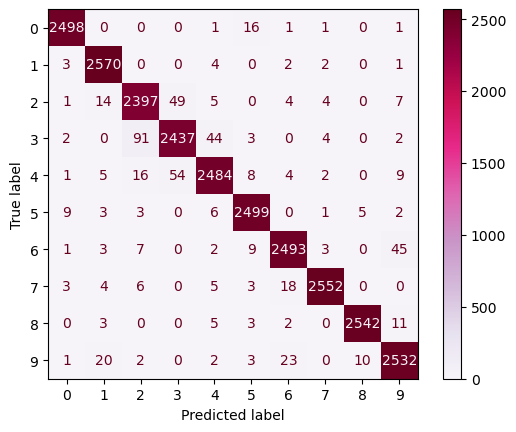

In [15]:
display = ConfusionMatrixDisplay(confusion_matrix = cf)
display.plot(cmap='PuRd')
plt.grid(False)
plt.show()

# Dimention Reduction

In [17]:
pca = PCA(n_components=64)
reduced = pca.fit_transform(train_images)

In [18]:
reduced_test = pca.transform(test_images)

# Fit a model and make predictions

In [19]:
model = RandomForestClassifier(n_jobs=-1)
_ = model.fit(reduced, train_labels)

# Evaluation

In [20]:
accuracy = model.score(reduced_test, test_labels)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy*100:.3f}%")

The test accuracy using a RandomForestClassifier is 96.018%


In [21]:
prediction = model.predict(reduced_test)
evaluation = classification_report(test_labels, prediction)
print(evaluation)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2518
         1.0       0.97      0.99      0.98      2582
         2.0       0.91      0.93      0.92      2481
         3.0       0.91      0.90      0.91      2583
         4.0       0.94      0.91      0.92      2583
         5.0       0.98      0.98      0.98      2528
         6.0       0.97      0.96      0.97      2563
         7.0       0.99      0.98      0.98      2591
         8.0       0.99      0.98      0.99      2566
         9.0       0.95      0.97      0.96      2593

    accuracy                           0.96     25588
   macro avg       0.96      0.96      0.96     25588
weighted avg       0.96      0.96      0.96     25588



# Confusion matrix

In [22]:
cf = confusion_matrix(test_labels, prediction)

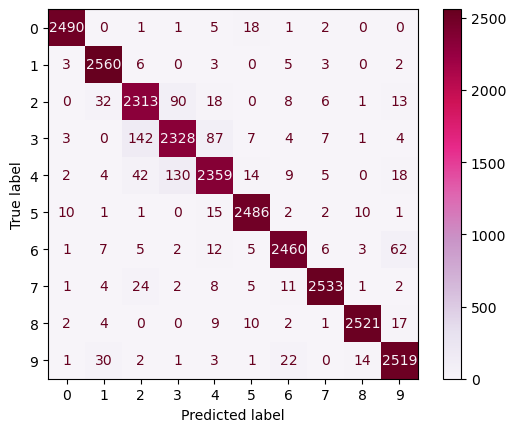

In [23]:
display = ConfusionMatrixDisplay(confusion_matrix = cf)
display.plot(cmap='PuRd')
plt.grid(False)
plt.show()

# Conclusion

We observe a slight decrease in model accuracy after dimension reduction. This decline can be attributed to the omission of certain features that may contain critical information.

Despite the marginal decrease in accuracy, the significant reduction in system overhead achieved through dimension reduction outweighs this effect.

The accuracy of the model without dimension reduction is 97%, while with dimension reduction it stands at 96%.